<a href="https://colab.research.google.com/github/anhhao04/NguyenAnhHao-20104006.github.io/blob/main/Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Rice

/content/drive/MyDrive/Colab Notebooks/Rice


In [ ]:
train_datagen=ImageDataGenerator( rescale=1./255,shear_range=0.2, zoom_range= 0.2, horizontal_flip=True)

In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Rice/Train',target_size=(100,150), batch_size=32, class_mode='categorical')

Found 150 images belonging to 5 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Rice/Validation',target_size=(100,150), batch_size=32, class_mode='categorical')

Found 52 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'Gạo ST25': 0,
 'Gạo hoang Bắc Mỹ': 1,
 'Gạo lứt': 2,
 'Gạo nếp': 3,
 'Gạo đen': 4}

In [ ]:
validation.class_indices

{'Gạo ST25': 0,
 'Gạo hoang Bắc Mỹ': 1,
 'Gạo lứt': 2,
 'Gạo nếp': 3,
 'Gạo đen': 4}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/100
5/5 [==============================] - 84s 14s/step - loss: 4.9617 - accuracy: 0.2267 - val_loss: 1.6025 - val_accuracy: 0.1923
Epoch 2/100
5/5 [==============================] - 1s 300ms/step - loss: 1.5515 - accuracy: 0.2733 - val_loss: 1.4902 - val_accuracy: 0.2885
Epoch 3/100
5/5 [==============================] - 1s 297ms/step - loss: 1.3956 - accuracy: 0.3333 - val_loss: 1.2302 - val_accuracy: 0.4038
Epoch 4/100
5/5 [==============================] - 1s 300ms/step - loss: 1.2411 - accuracy: 0.3733 - val_loss: 1.0526 - val_accuracy: 0.5000
Epoch 5/100
5/5 [==============================] - 1s 297ms/step - loss: 0.9005 - accuracy: 0.5667 - val_loss: 0.6783 - val_accuracy: 0.7115
Epoch 6/100
5/5 [==============================] - 1s 303ms/step - loss: 0.7172 - accuracy: 0.6733 - val_loss: 0.5214 - val_accuracy: 0.7308
Epoch 7/100
5/5 [==============================] - 2s 329ms/step - loss: 0.6695 - accuracy: 0.6467 - val_loss: 0.4876 - val_accuracy: 0.7500
Epoch 8/100
5/

In [ ]:
Score=model.evaluate(x_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.2660408914089203
Train Accuracy 0.8933333158493042


<function matplotlib.pyplot.show(*args, **kw)>

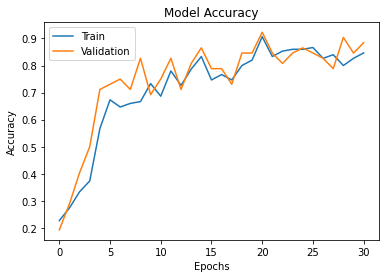

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Gạo.h5")

In [ ]:
model_CNN=load_model('Gạo.h5')

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/Rice/Test"

1/1 [==============================] - 0s 18ms/step
Gạo đen


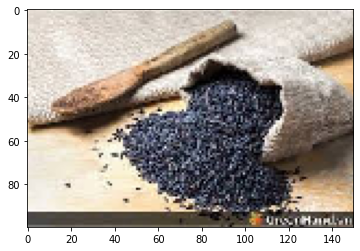

1/1 [==============================] - 0s 19ms/step
Gạo hoang Bắc Mỹ


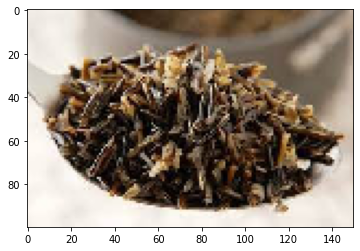

1/1 [==============================] - 0s 17ms/step
Gạo nếp


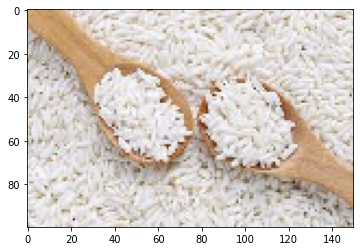

1/1 [==============================] - 0s 17ms/step
Gạo ST25


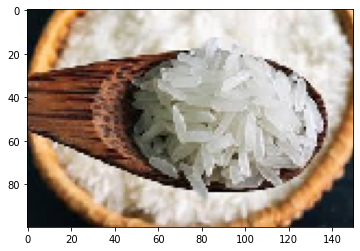

1/1 [==============================] - 0s 21ms/step
Gạo ST25


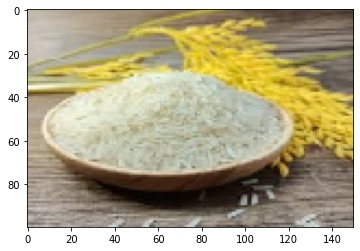

1/1 [==============================] - 0s 17ms/step
Gạo lứt


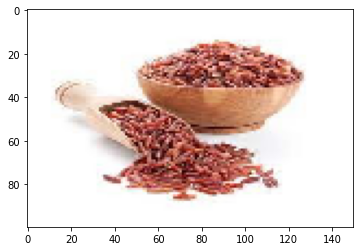

1/1 [==============================] - 0s 25ms/step
Gạo lứt


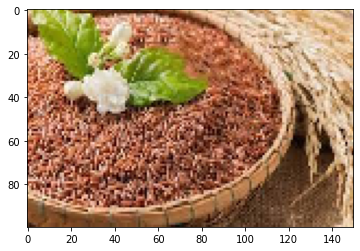

In [ ]:
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(100,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Gạo ST25'
  if round(result[0][1])==1:
    prediction='Gạo hoang Bắc Mỹ'
  if round(result[0][2])==1:
    prediction='Gạo lứt'
  if round(result[0][3])==1:
    prediction='Gạo nếp'
  if round(result[0][4])==1:
    prediction='Gạo đen'
  print(prediction)
  plt.show()